In [1]:
import pandas as pd

In [2]:
seed=1234

In [3]:
#Abro el archivo con la informacion
#Normalizada
data = pd.read_csv('attritionDataWithDummyVarsAndNorm.csv')
#Sin normalizar
#data = pd.read_csv('attritionDataWithDummyVars.csv')

### Data split

In [4]:
y=data['Dummy_Attrition_Yes']
x=data.drop(['Dummy_Attrition_Yes'], axis=1)

In [5]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Dummy_JobRole_Research Director,Dummy_JobRole_Research Scientist,Dummy_JobRole_Sales Executive,Dummy_JobRole_Sales Representative,Dummy_MaritalStatus_Divorced,Dummy_MaritalStatus_Married,Dummy_MaritalStatus_Single,Dummy_Over18_Y,Dummy_OverTime_No,Dummy_OverTime_Yes
0,0.45,0.74,-1.01,-0.89,-1.70,-0.66,1.38,0.38,-0.06,1.15,...,0,0,1,0,0,0,1,1,0,1
1,1.32,-1.30,-0.15,-1.87,-1.70,0.25,-0.24,-1.03,-0.06,-0.66,...,0,1,0,0,0,1,0,1,1,0
2,0.01,1.41,-0.89,-0.89,-1.70,1.17,1.28,-1.03,-0.96,0.25,...,0,0,0,0,0,0,1,1,0,1
3,-0.43,1.46,-0.76,1.06,-1.69,1.17,-0.49,0.38,-0.96,0.25,...,0,1,0,0,0,1,0,1,0,1
4,-1.09,-0.52,-0.89,-1.87,-1.69,-1.58,-1.27,0.38,-0.96,-0.66,...,0,0,0,0,0,1,0,1,1,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed )

In [7]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

kernel_Options = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
bestkernel=''
bestMetric=0

for k in kernel_Options:
    result = cross_val_score(svm.SVC(kernel=k,random_state=seed),x_train, y_train,cv=3,scoring="accuracy").mean()
    scores.append(result)
    print("Kernel is %s and metric is %s" % (k, result))
    if result > bestMetric:
        bestMetric=result
        bestkernel=k
    
    
#cross_val_score
#
#‘accuracy’
#‘roc_auc’
#"f1_weighted"
# f1
#https://scikit-learn.org/stable/modules/model_evaluation.html    

Kernel is linear and metric is 0.8678328474246841
Kernel is poly and metric is 0.8435374149659864
Kernel is rbf and metric is 0.8503401360544217
Kernel is sigmoid and metric is 0.8513119533527697


In [8]:
print("Best Kernel is %s and metric is %s" % (bestkernel, bestMetric))

Best Kernel is linear and metric is 0.8678328474246841


In [9]:
# Uncoment if you want to force

#bestkernel='linear'
#bestkernel='poly'
#bestkernel='rbf'
#bestkernel='sigmoid'

In [10]:
from bayes_opt import BayesianOptimization

In [11]:
#Defines the function to maximize adding a cross validation feature to prevent overfitting 

from sklearn.model_selection import cross_val_score

def boParams(C, gamma):
    
    params = {
        'C': C,
        'gamma': gamma,
        'kernel': bestkernel
    }
  

    result = cross_val_score(svm.SVC(random_state=seed, **params),
                             x_train, y_train,cv=3,scoring="f1_weighted").mean()
    
    #cv_result = xgb.cv(params, train_dmatrix, nfold=5)
    return result.mean()


#cross_val_score
#
#‘accuracy’
#‘roc_auc’
#"f1_weighted"
# f1
#https://scikit-learn.org/stable/modules/model_evaluation.html


In [12]:
# Sets the limits for the iteration of the different parameters

bo = BayesianOptimization(boParams, {'C': (0.01, 10),
                                             'gamma': (0.01, 10)
                                             },random_state=seed)

In [13]:
results = bo.maximize(n_iter=200, init_points=16)

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.8499    | 1.923     | 6.225     |
| 2         | 0.8485    | 4.383     | 7.856     |
| 3         | 0.8496    | 7.802     | 2.733     |
| 4         | 0.8507    | 2.772     | 8.021     |
| 5         | 0.851     | 9.582     | 8.761     |
| 6         | 0.8485    | 3.585     | 5.015     |
| 7         | 0.8496    | 6.838     | 7.13      |
| 8         | 0.8477    | 3.709     | 5.616     |
| 9         | 0.8477    | 5.036     | 0.1475    |
| 10        | 0.8496    | 7.731     | 8.828     |
| 11        | 0.8485    | 3.655     | 6.158     |
| 12        | 0.8498    | 0.7631    | 3.695     |
| 13        | 0.851     | 9.332     | 6.517     |
| 14        | 0.8485    | 3.978     | 7.889     |
| 15        | 0.8492    | 3.175     | 5.685     |
| 16        | 0.8502    | 8.693     | 4.367     |
| 17        | 0.851     | 9.443     | 7.651     |
| 18        | 0.8502    | 8.537     | 7.092     |


| 100       | 0.8507    | 2.497     | 6.153     |
| 101       | 0.851     | 9.476     | 4.855     |
| 102       | 0.8504    | 6.96      | 5.156     |
| 103       | 0.8507    | 2.502     | 3.266     |
| 104       | 0.8507    | 2.35      | 8.574     |
| 105       | 0.8485    | 4.043     | 4.073     |
| 106       | 0.8485    | 3.463     | 7.129     |
| 107       | 0.8483    | 6.074     | 5.409     |
| 108       | 0.851     | 8.16      | 2.035     |
| 109       | 0.851     | 7.773     | 7.479     |
| 110       | 0.851     | 9.578     | 3.897     |
| 111       | 0.8502    | 8.564     | 0.02928   |
| 112       | 0.8507    | 2.151     | 7.891     |
| 113       | 0.8502    | 9.616     | 0.6694    |
| 114       | 0.8491    | 5.588     | 9.255     |
| 115       | 0.8496    | 7.54      | 9.604     |
| 116       | 0.8493    | 1.569     | 9.439     |
| 117       | 0.8496    | 6.562     | 1.484     |
| 118       | 0.8491    | 6.185     | 6.663     |
| 119       | 0.8518    | 8.014     | 4.84      |


| 200       | 0.8496    | 7.608     | 0.3393    |
| 201       | 0.8502    | 8.46      | 0.9323    |
| 202       | 0.8492    | 3.119     | 7.662     |
| 203       | 0.851     | 9.998     | 2.614     |
| 204       | 0.8507    | 3.0       | 6.519     |
| 205       | 0.8485    | 4.072     | 8.552     |
| 206       | 0.8496    | 7.121     | 1.137     |
| 207       | 0.8507    | 2.492     | 4.486     |
| 208       | 0.8502    | 8.174     | 0.2567    |
| 209       | 0.851     | 9.1       | 0.01      |
| 210       | 0.8485    | 3.452     | 4.349     |
| 211       | 0.8502    | 9.613     | 5.307     |
| 212       | 0.8507    | 2.435     | 9.54      |
| 213       | 0.8502    | 9.725     | 6.637     |
| 214       | 0.851     | 9.033     | 6.079     |
| 215       | 0.8502    | 9.027     | 7.266     |
| 216       | 0.851     | 8.036     | 7.006     |


In [14]:
#Prints optimal parameters
params = bo.max['params']
print(params)

{'C': 1.2552619894109958, 'gamma': 0.013454622889540413}


In [15]:
model = svm.SVC(**params,kernel=bestkernel,random_state=seed)
model.fit(x_train, y_train)



SVC(C=1.2552619894109958, gamma=0.013454622889540413, kernel='linear',
    random_state=1234)

In [16]:
y_pred_train=model.predict(x_train)

In [17]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_pred_train)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[849  14]
 [ 93  73]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.84      0.44      0.58       166

    accuracy                           0.90      1029
   macro avg       0.87      0.71      0.76      1029
weighted avg       0.89      0.90      0.88      1029



In [19]:
#need this to plot the AOC 
modelaux = svm.SVC(**params,kernel=bestkernel,probability=True,random_state=seed)
modelaux.fit(x_train, y_train)

SVC(C=1.2552619894109958, gamma=0.013454622889540413, kernel='linear',
    probability=True, random_state=1234)

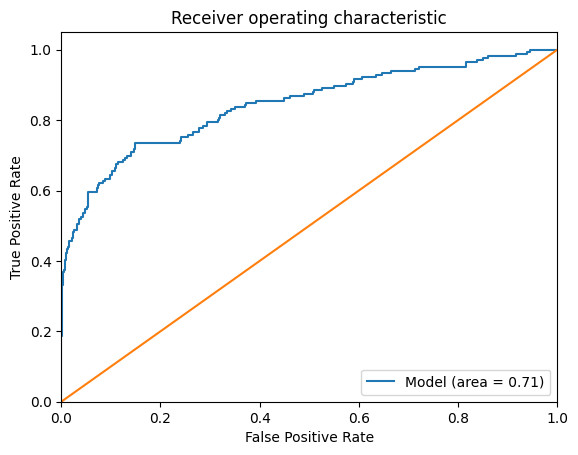

In [20]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_train, model.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, modelaux.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[363   7]
 [ 44  27]]


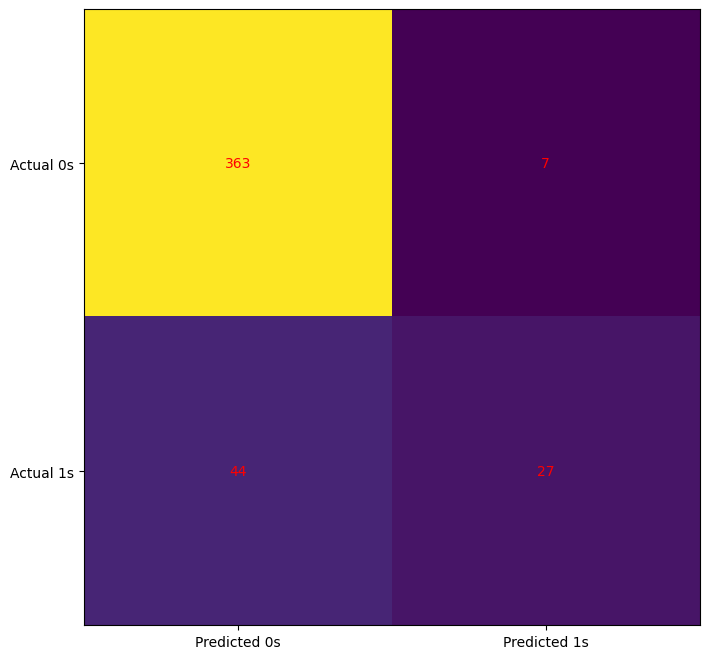

In [23]:
import matplotlib.pyplot as plt
cm = confusionMatrix

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is the ratio tp / (tp + fp) % of real positive over all the positives given by the algorithm
#recall is the ratio tp / (tp + fn) positive predictions over total positive
#Accuracy tp+tn/(tp+tn+fp+fn)
#Specificity= tn/tn+fp negative predictions over total positive

tn=confusionMatrix[0,0]
fp=confusionMatrix[0,1]
fn=confusionMatrix[1,0]
tp=confusionMatrix[1,1]

# Second line on output is the good one

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.79      0.38      0.51        71

    accuracy                           0.88       441
   macro avg       0.84      0.68      0.72       441
weighted avg       0.88      0.88      0.87       441



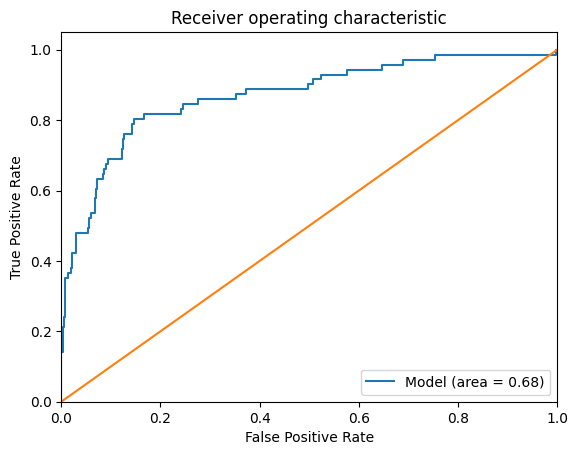

In [25]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, modelaux.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

## Semillerio

In [26]:
def is_prime(num):
    if num <= 1:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def generate_primes(n):
    primes = []
    num = 2 + seed
    while len(primes) < n:
        if is_prime(num):
            primes.append(num)
        num += 1
    return primes

In [27]:
n=30

In [28]:
import numpy as np
prime_list = generate_primes(n)
yPredSem=np.zeros_like(y_test)

In [29]:
for prime in prime_list:
    modelSem = svm.SVC(**params,kernel=bestkernel,random_state=prime)
    modelSem.fit(x_train,y_train)
    pred = modelSem.predict(x_test)
    yPredSem=yPredSem+pred

In [30]:
yPredSem=np.round(yPredSem / n).astype(int)

In [31]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,yPredSem))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.79      0.38      0.51        71

    accuracy                           0.88       441
   macro avg       0.84      0.68      0.72       441
weighted avg       0.88      0.88      0.87       441



In [32]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, yPredSem)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[363   7]
 [ 44  27]]


In [33]:
model_roc_auc = roc_auc_score(y_test,yPredSem)
model_roc_auc

0.680681385610963

In [34]:
aux=x_test
aux['predict']=yPredSem
aux[['EmployeeNumber','predict']]

,EmployeeNumber,predict
298,-1.03,0
625,-0.27,0
1349,1.44,0
1361,1.48,0
343,-0.93,0
...,...,...
1395,1.56,0
305,-1.01,0
1256,1.22,0
553,-0.43,0


### Export results to CSV

In [35]:
aux.to_csv('AttrttionResultsSVM', index=False) 